<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793546-Ariel-Corral-Leon/blob/main/Actividad_Sem_6_Visualizacion_A01793546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

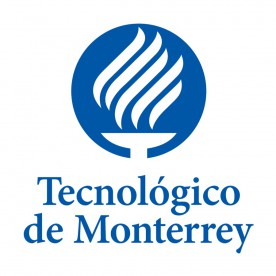

#Ciencia y analítica de datos 

###Actividad Semanal -- 6 Visualización

#### Nombre: ***José Ariel Corral Leon***
#### Matricula: ***A01793546***

Los objetivos para esta actividad seran los siguienteS:<BR>

*1 Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta.*<BR>
*2 Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()*<BR>
*3 Limpia los datos eliminando los registros nulos o rellena con la media de la columna*<BR>
*4 Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión*<BR>
*5 Realiza el conteo de las variables categóricas*<BR>
*6 Escala los datos, si consideras necesario*<BR>
*7 Reduce las dimensiones con PCA, si consideras necesario.*<BR>
*7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%*<BR>
*7.3  Indica la importancia de las variables en cada componente*<BR>
*8 Elabora los histogramas de los atributos para visualizar su distribución*<BR>
*9 Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.*<BR>
*10 Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.*<BR>

In [1]:
import pandas as pd #importación de librerias de pandas
import numpy as np #importación de librerias de numpy
import matplotlib.pyplot as plt # Importación de librerías de Matplot
import seaborn as sns # Importación de librerias de Seaborn

In [ ]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv' # dirección del documento

In [ ]:
path

'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv'

In [ ]:
df = pd.read_csv(path, index_col=0)
df.index.name= None
df.head(5)

,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
3,33,F,1,Y,1,66.0,64.0,85,Y,1,0
4,39,F,1,N,0,64.0,63.0,87,Y,1,10
5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [ ]:
df.columns

Index(['Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup', 'Height',
       'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup', 'Score'],
      dtype='object')

In [ ]:
drop = ['Gender', 'Glasses','Complete']
df.drop(columns = drop, inplace=True)

In [ ]:
df.head()

,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
1,56,1,1,62.0,61.0,79,1,7
2,26,1,1,62.0,60.0,70,1,8
3,33,1,1,66.0,64.0,85,1,0
4,39,1,0,64.0,63.0,87,1,10
5,27,2,0,73.0,75.0,72,0,4


In [ ]:
df.Score.min()

0

In [ ]:
df.Score.max()

10

In [ ]:
varX = df.Score.head(10) # solo para tener 10 datos en variable

In [ ]:
varX

1      7
2      8
3      0
4     10
5      4
6      3
7     10
8      9
9      5
10     8
Name: Score, dtype: int64

## 1. Normalización - Min - Max

Formula:
$$ s_1^{new} = \cfrac{x_1^{old}-min(varX)/{range(varX)}}$$

## 1. Normalización - Min - Max

Formula:

$$ x_i^{new} = \cfrac{x_i{old}-min(varX)/{range(varX)}$$


In [ ]:
def normalizarMinMax(x):
  min = np.min(x)
  max= np.max(x)
  range = max - min
  return [(xi - min)/
          range
          for xi in x
          ]

In [ ]:
x = varX.copy()
y = normalizarMinMax(x)
y

[0.7, 0.8, 0.0, 1.0, 0.4, 0.3, 1.0, 0.9, 0.5, 0.8]

In [ ]:
print(min(y))
print(max(y))

0.0
1.0


In [ ]:
print(min(x))
print(max(x))

0
10


Formula: $$ x_i^{new} = x_i{old}*rango_{nuevo} + {}

In [ ]:
y

[0.7, 0.8, 0.0, 1.0, 0.4, 0.3, 1.0, 0.9, 0.5, 0.8]

In [ ]:
min(y)

0.0

In [ ]:
max (y)

1.0

In [ ]:
def nomalizacionNuevoRango (alist, nLoBound, nUpBound):
  rango = nUpBound - nLoBound
  return [
      xi * rango + nLoBound
      for xi in alist
  ]

In [ ]:
z= nomalizacionNuevoRango(y,10,30)
z

[24.0, 26.0, 10.0, 30.0, 18.0, 16.0, 30.0, 28.0, 20.0, 26.0]

In [ ]:
print(min(z))

10.0


In [ ]:
print(max(z))

30.0


Formula de un ranto a otro rango

In [ ]:
x = varX.copy()

In [ ]:
def NormalizaciondeunrantoAotro(aList,LimInferior,LimSuperior):
  min = np.min(aList)
  max = np.max(aList)
  rango = max - min
  nRango = LimSuperior - LimInferior
  return [
      ((xi - min)/rango)*nRango + LimInferior
      for xi in aList
  ]

In [ ]:
z= NormalizaciondeunrantoAotro(X,100,200)
z

[170.0, 180.0, 100.0, 200.0, 140.0, 130.0, 200.0, 190.0, 150.0, 180.0]

In [ ]:
min(z)

100.0

In [ ]:
max(z)

200.0

Normalización a un DataFrame

In [ ]:
df

,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
1,56,1,1,62.00,61.0,79,1,7
2,26,1,1,62.00,60.0,70,1,8
3,33,1,1,66.00,64.0,85,1,0
4,39,1,0,64.00,63.0,87,1,10
5,27,2,0,73.00,75.0,72,0,4
6,24,2,0,75.00,71.0,81,0,3
7,28,2,0,75.00,76.0,107,1,10
8,22,1,0,65.00,62.0,98,1,9
9,29,2,1,74.00,73.0,106,0,5
10,33,1,1,63.00,60.0,65,1,8


In [ ]:
ndf = df.copy()

In [ ]:
ndf.head(10)

,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
1,56,1,1,62.0,61.0,79,1,7
2,26,1,1,62.0,60.0,70,1,8
3,33,1,1,66.0,64.0,85,1,0
4,39,1,0,64.0,63.0,87,1,10
5,27,2,0,73.0,75.0,72,0,4
6,24,2,0,75.0,71.0,81,0,3
7,28,2,0,75.0,76.0,107,1,10
8,22,1,0,65.0,62.0,98,1,9
9,29,2,1,74.0,73.0,106,0,5
10,33,1,1,63.0,60.0,65,1,8


In [ ]:
ndf.max()

Age               56.0
GenderGroup        2.0
GlassesGroup       1.0
Height            75.0
Wingspan          76.0
CWDistance       115.0
CompleteGroup      1.0
Score             10.0
dtype: float64

In [ ]:
ndfRange = ndf.max()-ndf.min()    
ndfRange

Age              34.0
GenderGroup       1.0
GlassesGroup      1.0
Height           13.5
Wingspan         18.5
CWDistance       52.0
CompleteGroup     1.0
Score            10.0
dtype: float64

In [ ]:
ndf=((ndf-ndf.min())/ndfRange.round(2))
ndf

,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
1,1.000000,0.0,1.0,0.037037,0.189189,0.307692,1.0,0.7
2,0.117647,0.0,1.0,0.037037,0.135135,0.134615,1.0,0.8
3,0.323529,0.0,1.0,0.333333,0.351351,0.423077,1.0,0.0
4,0.500000,0.0,0.0,0.185185,0.297297,0.461538,1.0,1.0
5,0.147059,1.0,0.0,0.851852,0.945946,0.173077,0.0,0.4
6,0.058824,1.0,0.0,1.000000,0.729730,0.346154,0.0,0.3
7,0.176471,1.0,0.0,1.000000,1.000000,0.846154,1.0,1.0
8,0.000000,0.0,0.0,0.259259,0.243243,0.673077,1.0,0.9
9,0.205882,1.0,1.0,0.925926,0.837838,0.826923,0.0,0.5
10,0.323529,0.0,1.0,0.111111,0.135135,0.038462,1.0,0.8


# PCA = Principal Component Analisis
##### *(Este analizis de realizara en otro DataSet)*

In [ ]:
NuevoPath = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cereals.csv'

In [ ]:
df = pd.read_csv(NuevoPath, index_col=0)
df.index.name= None
df.head(10)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [ ]:
df.shape

(77, 15)

In [ ]:
df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159
